<h1>Import Relevand Libraries</h1>

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree, svm, neighbors, naive_bayes
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

<h1> Load the Data </h1>

In [2]:
train_df = pd.read_csv("titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1> Data Explore </h1>

In [4]:
print(train_df.info())
print("\n" + "#" * 45 + "\n")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

#############################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [5]:
print(train_df.describe())
print("\n" + "#" * 75 + "\n")
print(train_df.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

###########################################################################

   

<h1> Data Cleaning </h1>

<h2> Drop irrelevant Columns </h2>

In [6]:
clean_train, clean_test = train_df.copy(), test_df.copy()
data_sets = [clean_train, clean_test]
for data in data_sets:
    data.drop(["Cabin", "Ticket"], axis=1, inplace=True)
clean_train.drop(['PassengerId'], axis=1, inplace=True)

In [7]:
print(clean_train.columns)
print("\n" + "#" * 95 + "\n")
print(clean_test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

###############################################################################################

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


<h2> Missing Data </h2>

In [8]:
print(clean_train.isnull().sum() / train_df.shape[0] * 100)
print("\n" + "#" * 45 + "\n")
print(clean_test.isnull().sum() / test_df.shape[0] * 100)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

#############################################

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Embarked        0.000000
dtype: float64


<Axes: xlabel='Pclass', ylabel='Age'>

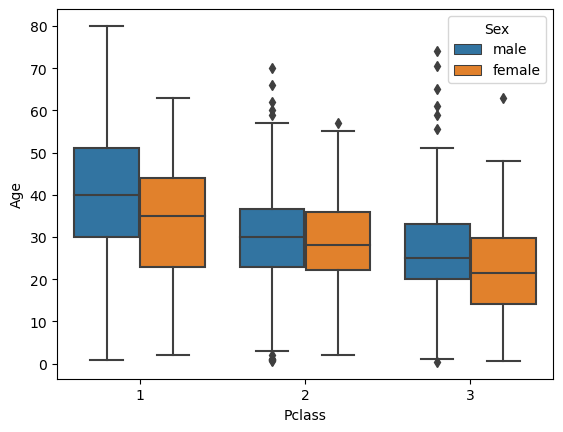

In [9]:
sns.boxplot(x='Pclass', y='Age', data=clean_train, hue='Sex')

In [10]:
print(clean_train.groupby(by=['Pclass', 'Sex'], as_index=False)['Age'].mean())

   Pclass     Sex        Age
0       1  female  34.611765
1       1    male  41.281386
2       2  female  28.722973
3       2    male  30.740707
4       3  female  21.750000
5       3    male  26.507589


<Axes: xlabel='Pclass', ylabel='Fare'>

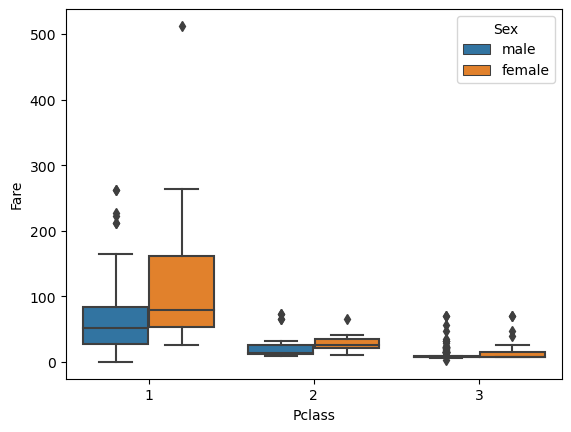

In [11]:
sns.boxplot(x='Pclass', y='Fare', hue='Sex', data=clean_test)

In [12]:
print(clean_train.groupby(by=['Pclass', 'Sex'], as_index=False)['Fare'].mean())

   Pclass     Sex        Fare
0       1  female  106.125798
1       1    male   67.226127
2       2  female   21.970121
3       2    male   19.741782
4       3  female   16.118810
5       3    male   12.661633


In [13]:
for data in data_sets:
    data['Age'] = data.apply(lambda row: data[(data['Pclass'] == row['Pclass']) & (data['Sex'] == row['Sex'])]['Age'].mean() 
                            if np.isnan(row['Age']) else row['Age'], axis=1)
    data['Fare'] = data.apply(lambda row: data[(data['Pclass'] == row['Pclass']) & (data['Sex'] == row['Sex'])]['Fare'].mean() 
                            if np.isnan(row['Fare']) else row['Fare'], axis=1)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [14]:
print(clean_train.isnull().sum() / train_df.shape[0] * 100)
print("\n" + "#" * 45 + "\n")
print(clean_test.isnull().sum() / test_df.shape[0] * 100)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

#############################################

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64


<h2> Check for duplicates </h2>

In [15]:
print(clean_train.duplicated().sum())
print("\n" + "#" * 25 + "\n")
print(clean_test.duplicated().sum())

0

#########################

0


<h1> Exploratory Analysis </h1>

<h2> Statistics Analysis </h2>

In [16]:
def survived_rate_by(c_columns):
    for column in c_columns:
        print(f"Rate of survived by {column}")
        print(clean_train[[column, "Survived"]].groupby(by=column, as_index=False).mean().sort_values(by='Survived', ascending=False))
        print("\n" + "#"*45 + "\n")

In [17]:
c_columns = ['Pclass', 'Sex', 'Embarked']
survived_rate_by(c_columns)

Rate of survived by Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

#############################################

Rate of survived by Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908

#############################################

Rate of survived by Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

#############################################



<h2> Visual Analysis </h2>

<Axes: xlabel='Embarked', ylabel='Survived'>

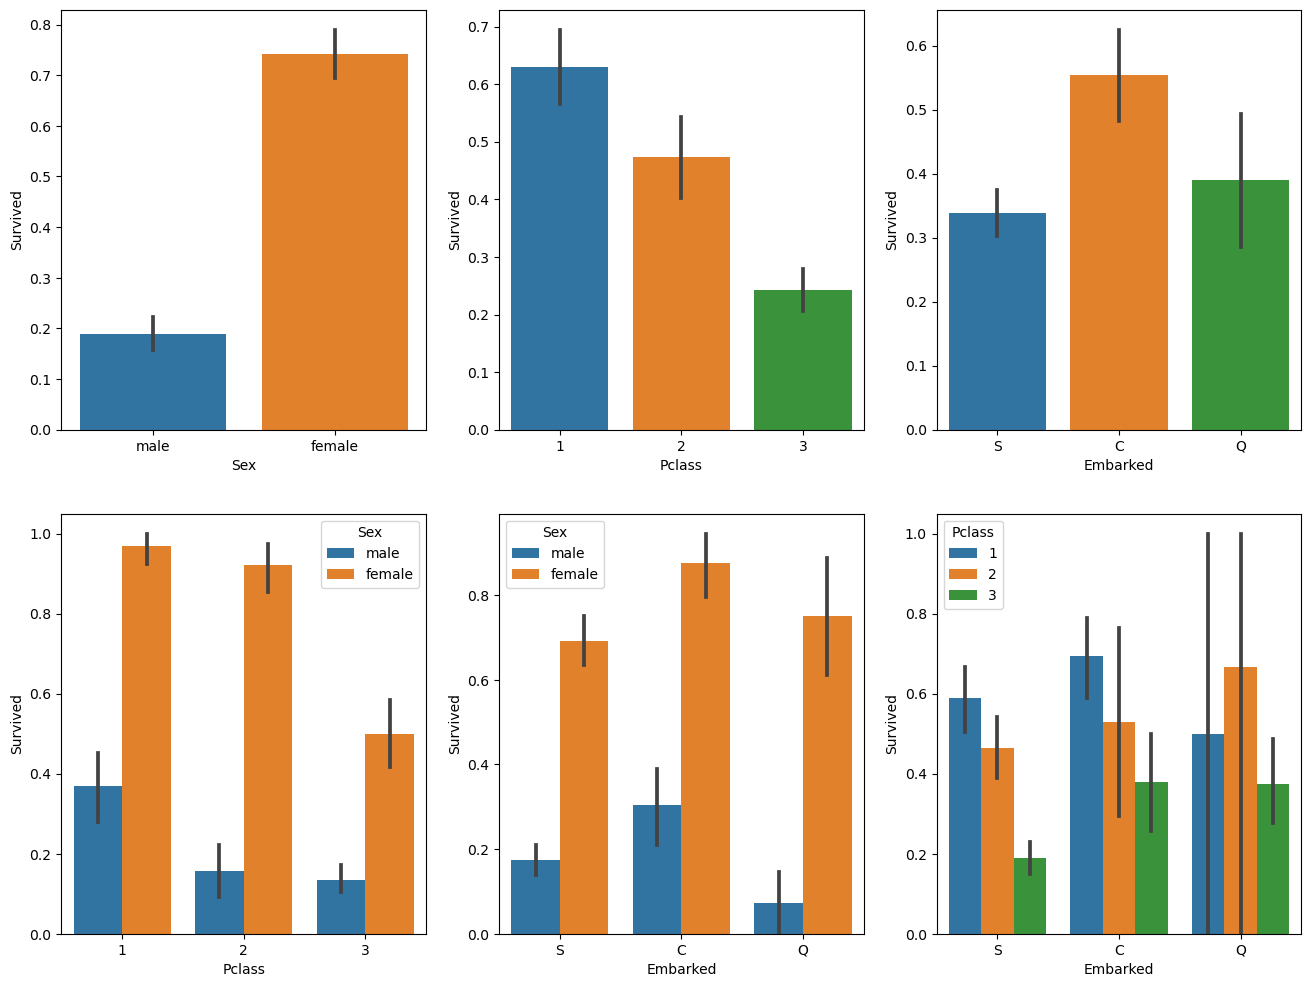

In [18]:
fig, ax = plt.subplots(2,3, figsize=(16, 12))
sns.barplot(x='Sex', y='Survived', data=clean_train, ax=ax[0, 0])
sns.barplot(x='Pclass', y='Survived', data=clean_train, ax=ax[0, 1])
sns.barplot(x='Embarked', y='Survived', data=clean_train, ax=ax[0,2])
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=clean_train, ax=ax[1, 0])
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=clean_train, ax=ax[1,1])
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=clean_train, ax=ax[1,2])

(0.0, 80.0)

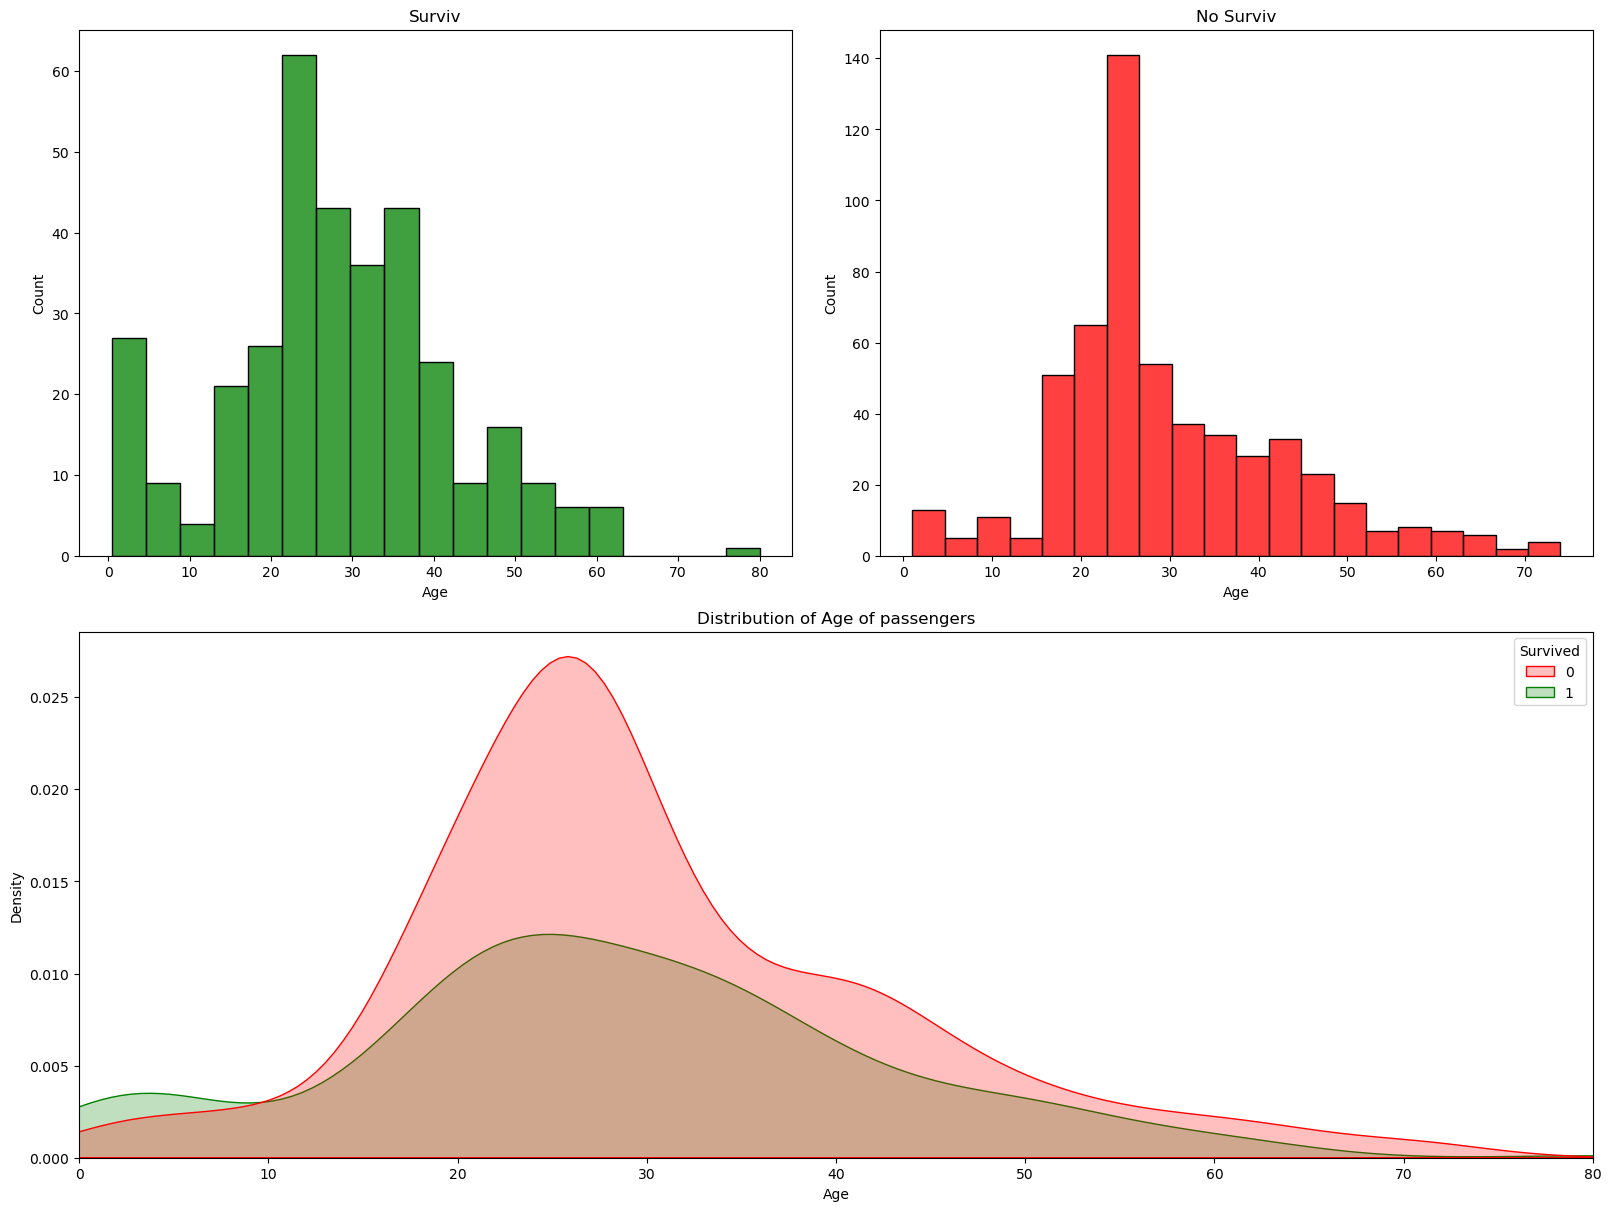

In [19]:
fig = plt.figure(figsize=(16, 12), layout="constrained")
spec = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(spec[0,0])
ax01 = fig.add_subplot(spec[0,1])
ax10 = fig.add_subplot(spec[1, :])
sns.histplot(x='Age', data=clean_train[clean_train['Survived'] == 1], ax=ax0, color='green', label='Survived')
sns.histplot(x='Age', data=clean_train[clean_train['Survived'] == 0], ax=ax01, color='red')
sns.kdeplot(x='Age', hue='Survived', data=clean_train, fill=True, ax=ax10, palette=['red', 'green'])
ax0.set_title("Surviv")
ax01.set_title("No Surviv")
ax10.set_title("Distribution of Age of passengers")
ax10.set_xlim(0, clean_train['Age'].max())

(-50.0, 512.3292)

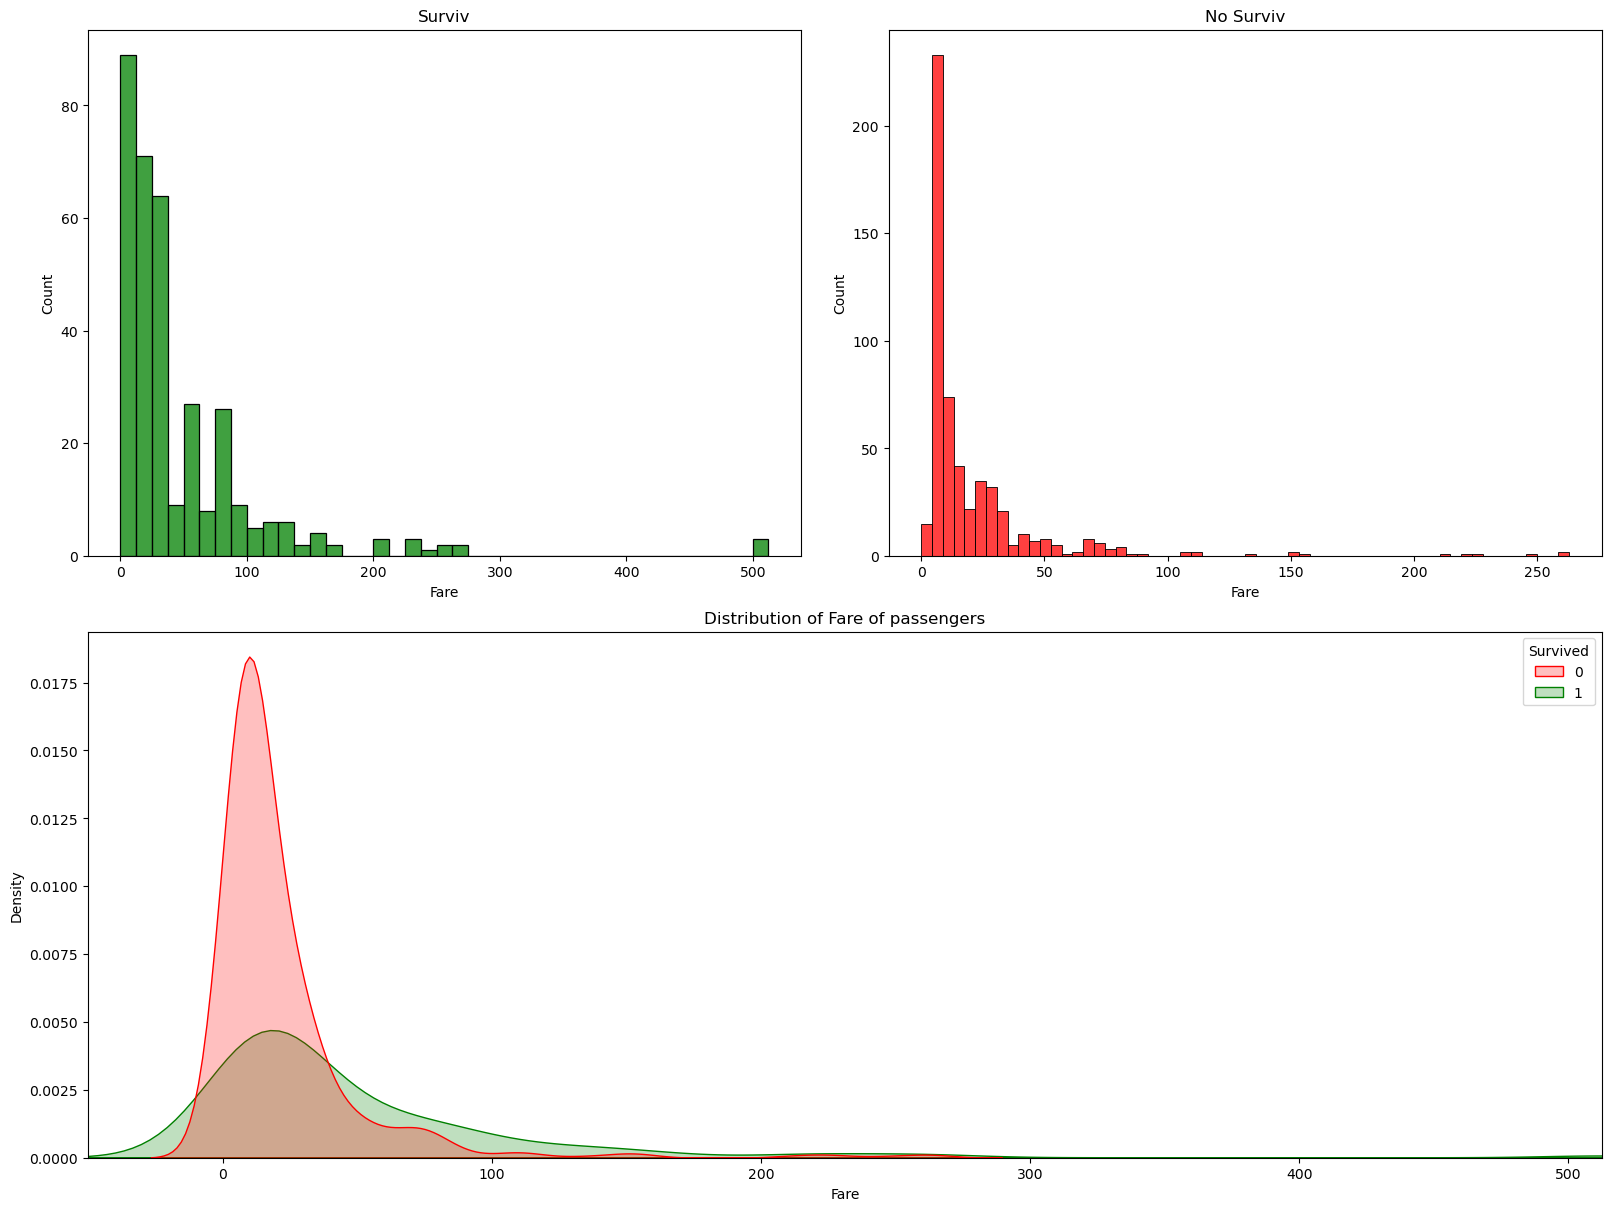

In [20]:
fig = plt.figure(figsize=(16, 12), layout="constrained")
spec = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(spec[0,0])
ax01 = fig.add_subplot(spec[0,1])
ax10 = fig.add_subplot(spec[1, :])
sns.histplot(x='Fare', data=clean_train[clean_train['Survived'] == 1], ax=ax0, color='green', label='Survived')
sns.histplot(x='Fare', data=clean_train[clean_train['Survived'] == 0], ax=ax01, color='red')
sns.kdeplot(x='Fare', hue='Survived', data=clean_train, fill=True, ax=ax10, palette=['red', 'green'])
ax0.set_title("Surviv")
ax01.set_title("No Surviv")
ax10.set_title("Distribution of Fare of passengers")
ax10.set_xlim(-50, clean_train['Fare'].max())

Text(0.5, 1.0, 'Sex distribution by Fare')

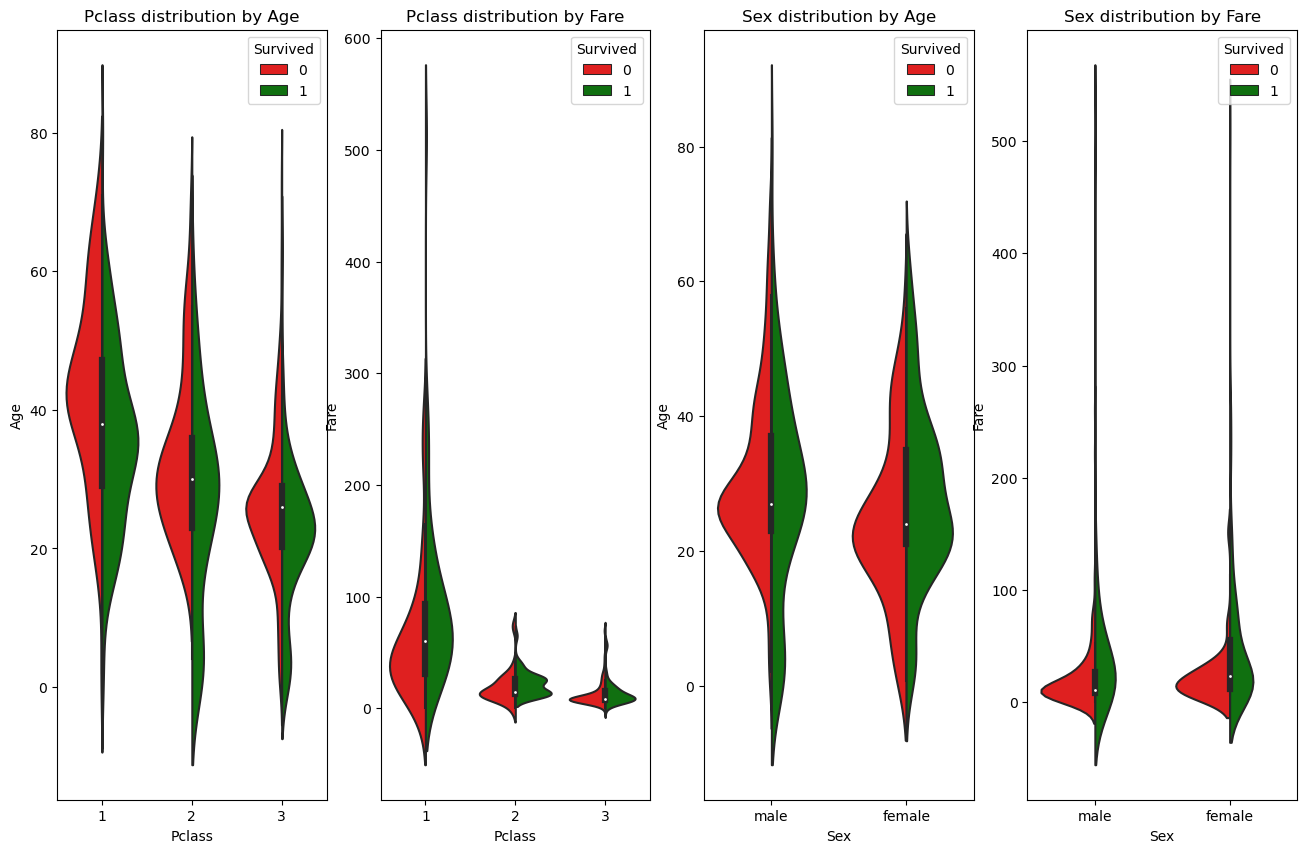

In [21]:
fig, ax = plt.subplots(1,4, figsize=(16,10))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=clean_train, split=True, ax=ax[0], palette=['red', 'green'])
ax[0].set_title("Pclass distribution by Age")
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=clean_train, split=True, ax=ax[1], palette=['red', 'green'])
ax[1].set_title("Pclass distribution by Fare")
sns.violinplot(x='Sex', y='Age', hue='Survived', data=clean_train, split=True, ax=ax[2], palette=['red', 'green'])
ax[2].set_title("Sex distribution by Age")
sns.violinplot(x='Sex', y='Fare', hue='Survived', data=clean_train, split=True, ax=ax[3], palette=['red', 'green'])
ax[3].set_title("Sex distribution by Fare")

<h1> Feature Engineering </h1>

In [22]:
for data in data_sets:
    data['Family_Size'] = data['SibSp'] + data['Parch']  + 1
    data['Alone'] = np.where(data['Family_Size'] == 1, 1, 0)
    data['Title'] =  data['Name'].apply(lambda x: re.search(r",\s([a-zA-Z]{1,12})\.", x).groups()[0] if re.search(r",\s([a-zA-Z]{1,12})\.", x) else x)
    data['Title'] = data['Title'].apply(lambda x: "Legendary" if data['Title'].value_counts()[x] < 20 else x)
    # data['Age_bin'] = pd.qcut(data['Age'], 5)
    # data['Fare_bin'] = pd.qcut(data['Fare'], 5)

In [23]:
# label = LabelEncoder()
# for data in data_sets:
#     data['Sex'] = label.fit_transform(data['Sex'])
#     data['Embarked'] = label.fit_transform(data['Embarked'])
#     data['Title'] = label.fit_transform(data['Title'])

In [24]:
clean_test.drop(["Name"], axis=1, inplace=True)
clean_train.drop(["Name"], axis=1, inplace=True)

In [25]:
print(clean_train.head())
print("\n" + "#" * 95 + "\n")
print(clean_test.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

   Family_Size  Alone Title  
0            2      0    Mr  
1            2      0   Mrs  
2            1      1  Miss  
3            2      0   Mrs  
4            1      1    Mr  

###############################################################################################

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0          892       3    male  34.5      0      0   7.8292        Q   
1          893       3  female  47.0      1      0   7.0000        S   
2          894       2    male  62.0      0      0   9.6875        Q   
3          895     

In [26]:
c_columns = ['Title', 'Alone', 'Family_Size']
survived_rate_by(c_columns)

Rate of survived by Title
       Title  Survived
4        Mrs  0.792000
2       Miss  0.697802
1     Master  0.575000
0  Legendary  0.444444
3         Mr  0.156673

#############################################

Rate of survived by Alone
   Alone  Survived
0      0  0.505650
1      1  0.303538

#############################################

Rate of survived by Family_Size
   Family_Size  Survived
3            4  0.724138
2            3  0.578431
1            2  0.552795
6            7  0.333333
0            1  0.303538
4            5  0.200000
5            6  0.136364
7            8  0.000000
8           11  0.000000

#############################################



In [27]:
clean_train = pd.get_dummies(clean_train, columns=['Embarked', 'Sex', 'Title'], dtype=int)
clean_test = pd.get_dummies(clean_test, columns=['Embarked', 'Sex', 'Title'], dtype=int)

<Axes: >

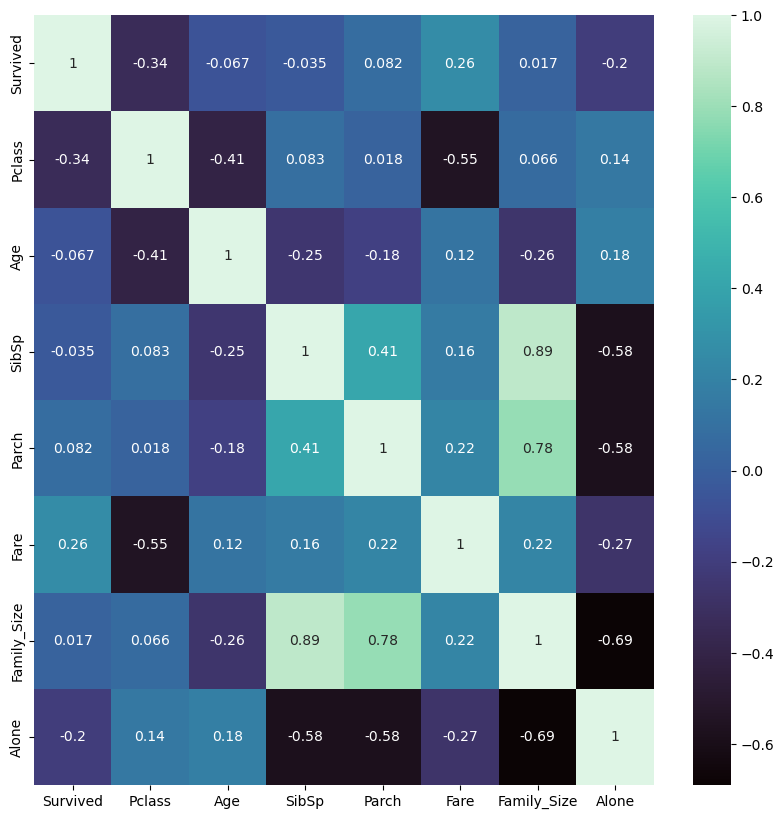

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(clean_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size','Alone']].corr(), annot=True, cmap='mako', ax=ax)

<h1> Model </h1>

<h2> Model Fitting & Prediction </h2>

In [29]:
X = clean_train.drop('Survived', axis=1)
Y = clean_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [30]:
ML = [
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
]

In [31]:
algorithm_name = []
score_mean = []
for algorithm in ML:
    scores = cross_validate(algorithm, x_train, y_train, cv=10)
    algorithm_name.append(algorithm.__class__.__name__)
    score_mean.append(scores['test_score'].mean())

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

In [32]:
scores_df = pd.DataFrame({"Algorithm": algorithm_name, "Accuracy Mean": score_mean}).sort_values(by="Accuracy Mean", ascending=False)
scores_df

,Algorithm,Accuracy Mean
2,LinearSVC,0.814808
6,GaussianNB,0.811854
1,NuSVC,0.810485
5,BernoulliNB,0.802054
4,ExtraTreeClassifier,0.778267
3,DecisionTreeClassifier,0.775450
0,SVC,0.671322


<Axes: xlabel='Accuracy Mean', ylabel='Algorithm'>

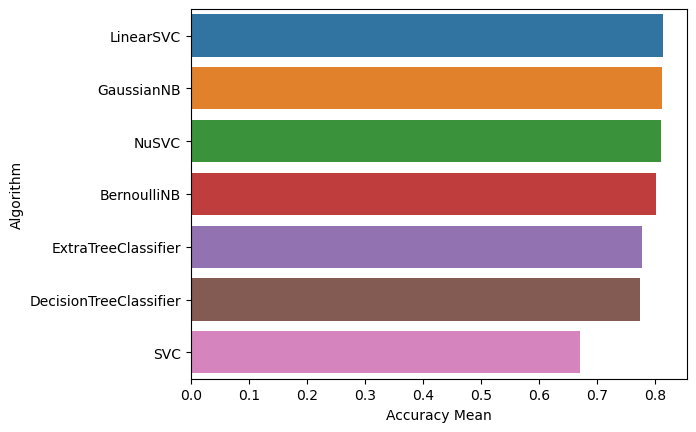

In [33]:
sns.barplot(y="Algorithm", x="Accuracy Mean", data=scores_df)

In [34]:
params = {
    'nu': [0.1, 0.3, 0.5],
    'kernel': ["poly", "rbf"]
}
tune_model = GridSearchCV(svm.NuSVC(probability=True), param_grid=params, scoring='roc_auc', cv=10)
tune_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=NuSVC(probability=True),
             param_grid={'kernel': ['poly', 'rbf'], 'nu': [0.1, 0.3, 0.5]},
             scoring='roc_auc')

In [38]:
tune_model.cv_results_['mean_test_score'][tune_model.best_index_]

0.8446677461212344

In [36]:
predict = tune_model.best_estimator_.predict(x_test)
accuracy_score(y_test, predict)

0.776536312849162

<h1> Prediction </h1>

In [40]:
X_test = clean_test.drop(['PassengerId'], axis=1)
f_predict = tune_model.best_estimator_.predict(X_test)

In [45]:
len(output)

418

In [46]:
output = pd.DataFrame({'PassengerId': clean_test['PassengerId'], 'Survived': f_predict})
print(output.info())
print("\n" + "#" * 45 + "\n")
print(output['Survived'].value_counts())
print("\n" + "#" * 45 + "\n")
print(output['Survived'].value_counts() / len(output) * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None

#############################################

Survived
0    248
1    170
Name: count, dtype: int64

#############################################

Survived
0    59.330144
1    40.669856
Name: count, dtype: float64


In [47]:
output.to_csv('submission.csv', index=False)